In [7]:
import numpy as np
import pandas as pd

In [8]:
import chardet
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
df = pd.read_csv('spam.csv', encoding=result['encoding'])


In [9]:
df.shape

(5572, 5)

Step 1:Data Cleaning
Step 2:EDA
Step 3:Text PreProcessing
Step 4:Model building
Step 5:Evaluation
Step 6:Improvement
Step 7:Website
Step 8:Deployment

1.Data Cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
1536,ham,How's it feel? Mr. Your not my real Valentine ...
3530,ham,Prepare to be pounded every night...
2866,ham,"Mum, i've sent you many many messages since i ..."
5439,ham,Hey i've booked the 2 lessons on sun liao...
2900,spam,Ur cash-balance is currently 500 pounds - to m...


In [13]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1324,ham,Can you call me plz. Your number shows out of ...
2573,spam,Congrats 2 mobile 3G Videophones R yours. call...
2084,ham,How are you. Wish you a great semester
1419,ham,\Speak only when you feel your words are bette...
3731,ham,Gud mrng dear hav a nice day


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#checking for missing values and duplicate values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.shape

(5169, 2)

2.EDA

In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

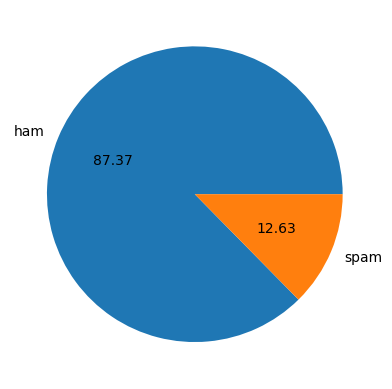

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
#Data is imbalanced

In [23]:
!pip install nltk

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
import nltk
from nltk.tokenize import TreebankWordTokenizer

# No need to download punkt_tab
tokenizer = TreebankWordTokenizer()

# Use tokenizer directly
df['num_word'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))
df

,target,text,num_characters,word_count,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23,23
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,36
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,33,33
5568,0,Will Ì_ b going to esplanade fr home?,37,9,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,14,14
5570,0,The guy did some bitching but I acted like i'd...,125,27,27


In [34]:
df.drop(columns=['word_count'],inplace=True)

In [35]:
df

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,33
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,14
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [39]:
import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[^.!?]+[.!?]', x)))


In [40]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,1
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,0


In [42]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,1.846198
std,58.236293,12.672457,1.745556
min,2.000000,1.000000,0.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,2.000000
75%,117.000000,25.000000,3.000000
max,910.000000,214.000000,39.000000


In [43]:
#ham
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.691984
std,56.358207,12.858450,1.681674
min,2.000000,1.000000,0.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,39.000000


In [44]:
#spam
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,2.912711
std,30.137753,6.579189,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

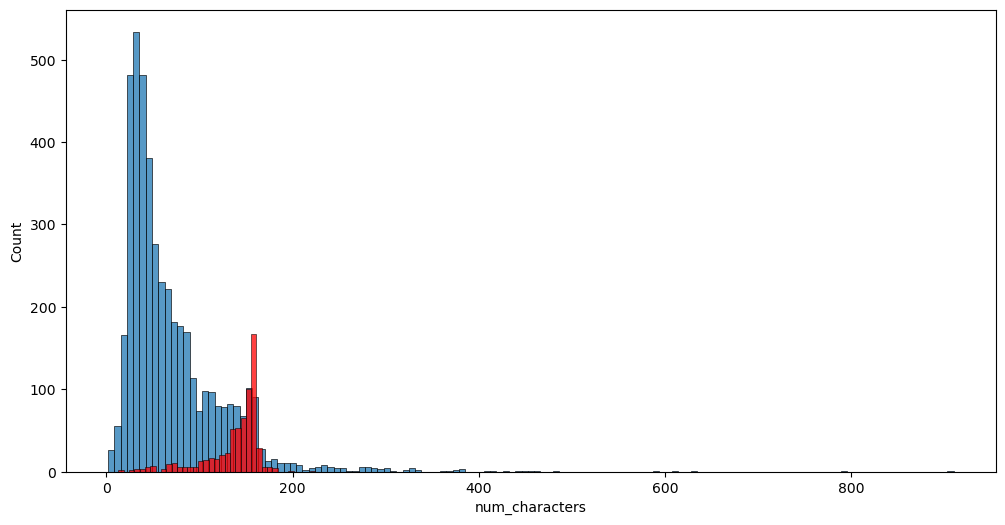

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

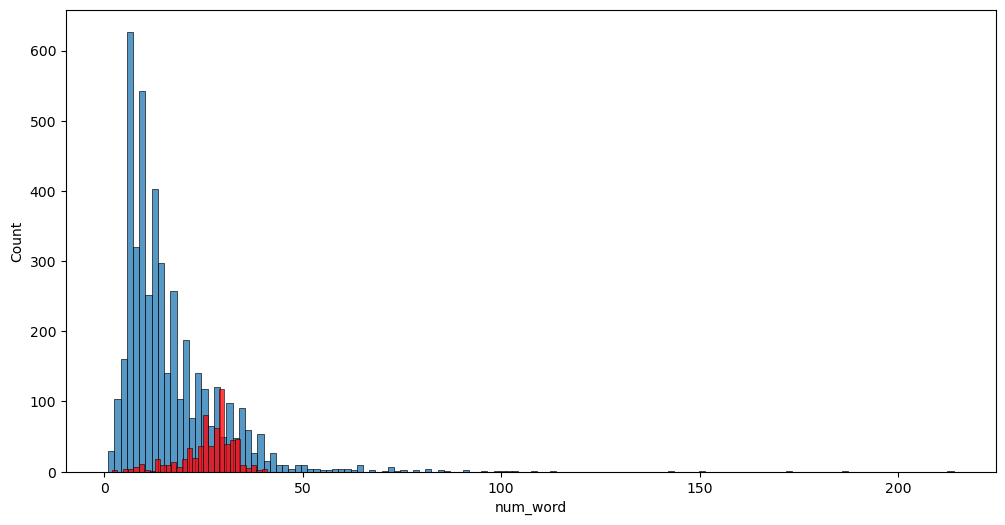

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

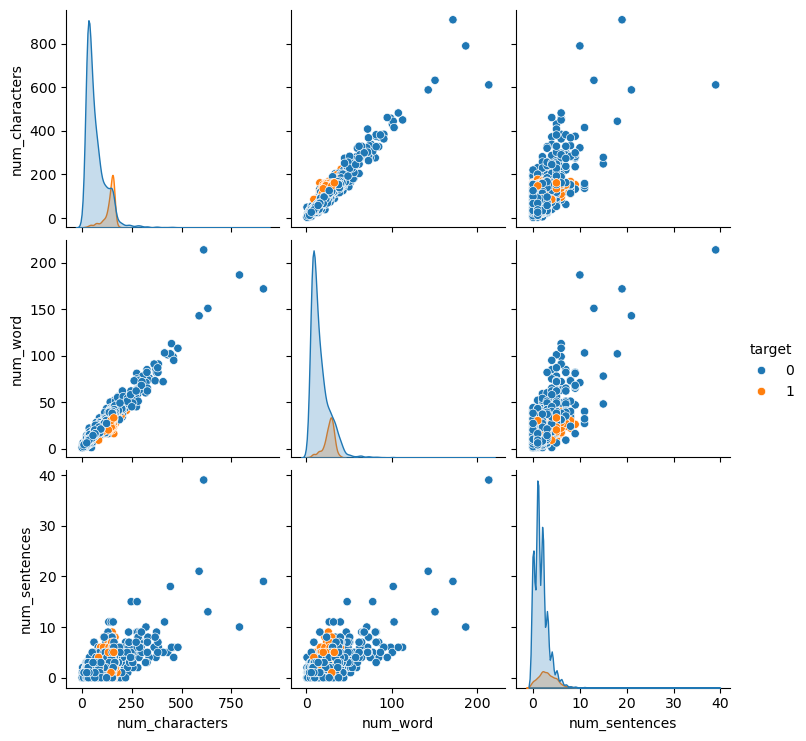

In [50]:
sns.pairplot(df,hue='target')

<Axes: >

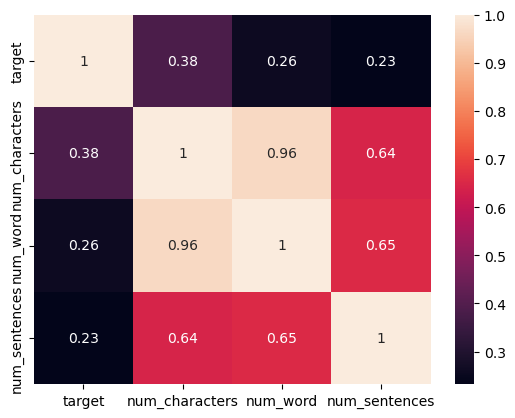

In [52]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [74]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = re.findall(r'\b\w+\b', text)  # Tokenize using regex
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    stemmed_tokens = [ps.stem(word) for word in filtered_tokens]  # Apply stemming
    return " ".join(stemmed_tokens)  # Return as a single string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [72]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [78]:
df['transformed_text']=df['text'].apply(transform_text)

In [77]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,0,nah think goe usf live around though


In [88]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [89]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

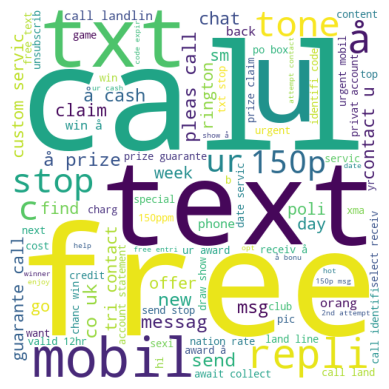

In [91]:
plt.axis('off')

plt.imshow(spam_wc)

In [92]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

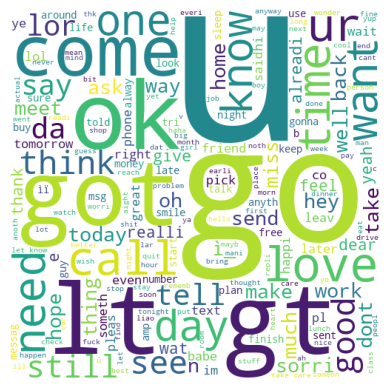

In [93]:
plt.axis('off')
plt.imshow(ham_wc)

In [96]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
len(spam_corpus)

11996

In [104]:
ham_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [105]:
len(ham_corpus)

11996

In [134]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [135]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [136]:
X.shape

(5169, 3000)

In [137]:
y=df['target'].values

In [138]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [141]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [142]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [143]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[789 107]
 [ 22 116]]
0.5201793721973094


In [144]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [145]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [ ]:
#tfidf-->MNB

In [146]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))